In [10]:
import config
import stats
from simulate import simulate
import matplotlib.pyplot as plt
import random

def reset_stats():
    stats.delays_type1.clear()
    stats.delays_type2.clear()
    stats.waiting_times_type1.clear()
    stats.waiting_times_type2.clear()
    stats.area_num_in_queue_type1 = 0.0
    stats.area_num_in_queue_type2 = 0.0
    stats.area_num_in_system_type1 = 0.0
    stats.area_num_in_system_type2 = 0.0

def run_simulation(serversA, serversB, seed=42):
    config.NUM_SERVERS_A = serversA
    config.NUM_SERVERS_B = serversB
    random.seed(seed)
    reset_stats()
    simulate()
    return {
        "A": serversA,
        "B": serversB,
        "delay1": sum(stats.delays_type1) / len(stats.delays_type1) if stats.delays_type1 else 0,
        "delay2": sum(stats.delays_type2) / len(stats.delays_type2) if stats.delays_type2 else 0,
        "wait1": sum(stats.waiting_times_type1) / len(stats.waiting_times_type1) if stats.waiting_times_type1 else 0,
        "wait2": sum(stats.waiting_times_type2) / len(stats.waiting_times_type2) if stats.waiting_times_type2 else 0,
        "q1": stats.area_num_in_queue_type1 / config.SIM_TIME,
        "q2": stats.area_num_in_queue_type2 / config.SIM_TIME
    }

## Experiência 1.2.1 — Comparação: 2A+1B vs. 3A+1B

In [11]:
result_2A1B = run_simulation(2, 1)
result_3A1B = run_simulation(3, 1)

[result_2A1B, result_3A1B]


--------------------Relatório da Simulação--------------------
Tipo 1 - atraso médio: 0h 0m 23s
Tipo 2 - atraso médio: 0h 0m 30s
Tipo 1 - tempo médio no sistema: 0h 1m 18s
Tipo 2 - tempo médio no sistema: 0h 1m 6s
Tipo 1 - número médio na fila: 0.022402915921717493
Tipo 2 - número médio na fila: 0.022090438147559014
Tipo 1 - número médio no sistema: 0.6246912798438682
Tipo 2 - número médio no sistema: 0.1315312109449201
Servidor A1 - % tempo com tipo 1: 36.41%, tipo 2: 7.58%
Servidor A2 - % tempo com tipo 1: 18.66%, tipo 2: 3.36%
Servidor B1 - % tempo com tipo 1: 5.16%, tipo 2: 10.94%
-------------------------------------------------------------


--------------------Relatório da Simulação--------------------
Tipo 1 - atraso médio: 0h 0m 22s
Tipo 2 - atraso médio: 0h 0m 23s
Tipo 1 - tempo médio no sistema: 0h 1m 16s
Tipo 2 - tempo médio no sistema: 0h 0m 59s
Tipo 1 - número médio na fila: 0.006100224988507975
Tipo 2 - número médio na fila: 0.010408985938537953
Tipo 1 - número médio no

[{'A': 2,
  'B': 1,
  'delay1': 0.39303361266171044,
  'delay2': 0.502055412444523,
  'wait1': 1.302994836918156,
  'wait2': 1.1138212225171342,
  'q1': 0.022402915921717493,
  'q2': 0.022090438147559014},
 {'A': 3,
  'B': 1,
  'delay1': 0.38126406178174843,
  'delay2': 0.3855179977236279,
  'wait1': 1.2827526025530436,
  'wait2': 0.986103208918956,
  'q1': 0.006100224988507975,
  'q2': 0.010408985938537953}]

## Experiência 1.2.2 — Comparação: 2A+1B vs. 2A+2B

In [12]:
result_2A1B_b = run_simulation(2, 1)
result_2A2B = run_simulation(2, 2)

[result_2A1B_b, result_2A2B]


--------------------Relatório da Simulação--------------------
Tipo 1 - atraso médio: 0h 0m 23s
Tipo 2 - atraso médio: 0h 0m 30s
Tipo 1 - tempo médio no sistema: 0h 1m 18s
Tipo 2 - tempo médio no sistema: 0h 1m 6s
Tipo 1 - número médio na fila: 0.022402915921717493
Tipo 2 - número médio na fila: 0.022090438147559014
Tipo 1 - número médio no sistema: 0.6246912798438682
Tipo 2 - número médio no sistema: 0.1315312109449201
Servidor A1 - % tempo com tipo 1: 36.41%, tipo 2: 7.58%
Servidor A2 - % tempo com tipo 1: 18.66%, tipo 2: 3.36%
Servidor B1 - % tempo com tipo 1: 5.16%, tipo 2: 10.94%
-------------------------------------------------------------


--------------------Relatório da Simulação--------------------
Tipo 1 - atraso médio: 0h 0m 24s
Tipo 2 - atraso médio: 0h 0m 22s
Tipo 1 - tempo médio no sistema: 0h 1m 5s
Tipo 2 - tempo médio no sistema: 0h 0m 59s
Tipo 1 - número médio na fila: 0.006478148761118391
Tipo 2 - número médio na fila: 0.009306892564709542
Tipo 1 - número médio no 

[{'A': 2,
  'B': 1,
  'delay1': 0.39303361266171044,
  'delay2': 0.502055412444523,
  'wait1': 1.302994836918156,
  'wait2': 1.1138212225171342,
  'q1': 0.022402915921717493,
  'q2': 0.022090438147559014},
 {'A': 2,
  'B': 2,
  'delay1': 0.4048842975698994,
  'delay2': 0.3722757025883817,
  'wait1': 1.09568175869132,
  'wait2': 0.9840665463891719,
  'q1': 0.006478148761118391,
  'q2': 0.009306892564709542}]

## Comparação visual dos delays médios

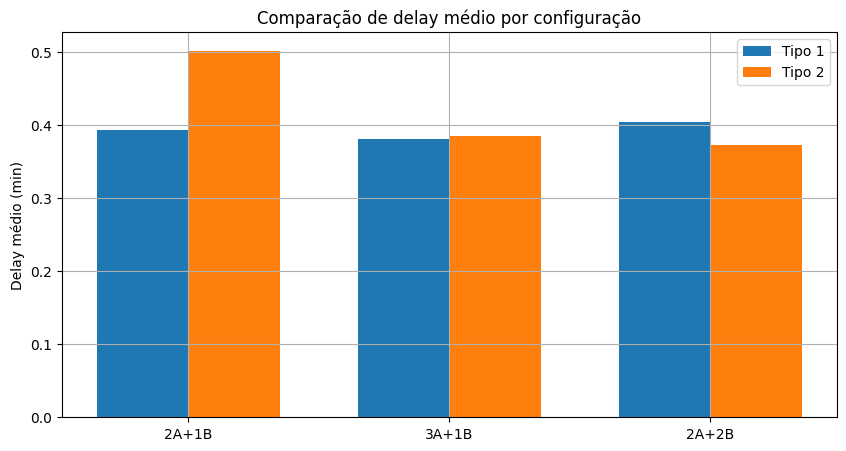

In [13]:
import numpy as np

labels = ["2A+1B", "3A+1B", "2A+2B"]
delays1 = [result_2A1B["delay1"], result_3A1B["delay1"], result_2A2B["delay1"]]
delays2 = [result_2A1B["delay2"], result_3A1B["delay2"], result_2A2B["delay2"]]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10, 5))
plt.bar(x - width/2, delays1, width, label="Tipo 1")
plt.bar(x + width/2, delays2, width, label="Tipo 2")

plt.xticks(x, labels)
plt.ylabel("Delay médio (min)")
plt.title("Comparação de delay médio por configuração")
plt.legend()
plt.grid(True)
plt.show()